In [1]:
import numpy as np
import pandas as pd

In [2]:
import datetime

In [4]:
from pandas_datareader import data,wb

In [6]:
YES = data.DataReader('YESBANK.NS','yahoo',start = '1-01-2015',end = '12-02-2022')

In [8]:
YES

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,154.929993,153.210007,153.800003,154.509995,3675025.0,145.045120
2015-01-02,159.160004,154.199997,154.600006,158.440002,10627395.0,148.734375
2015-01-05,160.979996,157.960007,159.300003,158.779999,14164070.0,149.053558
2015-01-06,157.759995,153.669998,157.710007,154.330002,12749005.0,144.876144
2015-01-07,155.199997,150.850006,154.000000,151.470001,15567125.0,142.191345
...,...,...,...,...,...,...
2022-02-07,14.150000,13.700000,13.900000,13.950000,107878882.0,13.950000
2022-02-08,14.250000,14.000000,14.050000,14.150000,148021736.0,14.150000
2022-02-09,14.350000,14.050000,14.250000,14.100000,68633731.0,14.100000


In [17]:
import cufflinks as cf
cf.go_offline()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(True)

In [19]:
YES['Close'].iplot()

In [20]:
#applying linear regression 

In [21]:
YES.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X = YES[['High', 'Low', 'Open','Volume', 'Adj Close']]
y = YES['Close']

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression()

In [27]:
prediction = lm.predict(X_test)

In [28]:
prediction

array([ 95.81867215, 236.79129107,  14.59736808,  17.65999603,
       204.60339661, 216.18845096,  13.77766248, 181.03103612,
        14.38777117, 193.75586452, 160.78033491, 143.3389973 ,
       231.03912748, 162.66777742, 157.79621689, 358.7826017 ,
       248.26666057, 186.96829217,  27.73495453,  80.42851659,
       161.47962267, 225.63518353,  14.34736513, 350.38331225,
       242.62640086, 320.68541799, 290.65718939,  13.65170118,
       346.08978319, 147.85226664,  17.81504631, 310.28507593,
        13.91935903,  41.46687666, 307.72903777, 208.59204791,
       165.07800703, 170.53912181,  14.86961057, 168.30975973,
        69.24313116, 165.99893829, 148.181712  ,  31.72414048,
       183.04282946,  69.23192169,  27.56542348, 113.30622813,
        28.32665517, 152.89336102, 308.02591004,  12.36714808,
       180.85532771,  14.10229625,  14.0446619 , 250.81401881,
        18.08934146,  64.45624285,  18.89911242, 235.52777117,
       158.96795324, 151.16397977, 284.5612139 , 238.99

In [29]:
y_test

Date
2019-07-26     96.050003
2019-03-06    235.300003
2020-11-17     14.650000
2021-01-20     17.650000
2016-05-27    205.100006
                 ...    
2020-12-28     17.799999
2018-12-17    181.000000
2019-03-15    245.050003
2017-05-25    292.850006
2017-06-07    298.750000
Name: Close, Length: 528, dtype: float64

In [37]:
pred = pd.Series(prediction)

In [36]:
pd.concat([y_test,pred],axis=1)

,Close,0
2019-07-26 00:00:00,96.050003,NaN
2019-03-06 00:00:00,235.300003,NaN
2020-11-17 00:00:00,14.650000,NaN
2021-01-20 00:00:00,17.650000,NaN
2016-05-27 00:00:00,205.100006,NaN
...,...,...
523,NaN,18.076993
524,NaN,182.023385
525,NaN,246.685038
526,NaN,291.511385


In [42]:
pred

0       95.818672
1      236.791291
2       14.597368
3       17.659996
4      204.603397
          ...    
523     18.076993
524    182.023385
525    246.685038
526    291.511385
527    298.656870
Length: 528, dtype: float64

In [43]:
y_test

Date
2019-07-26     96.050003
2019-03-06    235.300003
2020-11-17     14.650000
2021-01-20     17.650000
2016-05-27    205.100006
                 ...    
2020-12-28     17.799999
2018-12-17    181.000000
2019-03-15    245.050003
2017-05-25    292.850006
2017-06-07    298.750000
Name: Close, Length: 528, dtype: float64

In [44]:
from sklearn import metrics

In [45]:
metrics.mean_absolute_error(y_test,prediction)

0.9489975001910957

In [46]:
metrics.mean_squared_error(y_test,prediction)

1.6379949856636478

In [47]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

1.2798417814963097

In [56]:
y_test.reset_index()['Date']

0     2019-07-26
1     2019-03-06
2     2020-11-17
3     2021-01-20
4     2016-05-27
         ...    
523   2020-12-28
524   2018-12-17
525   2019-03-15
526   2017-05-25
527   2017-06-07
Name: Date, Length: 528, dtype: datetime64[ns]

In [59]:
PRED = pd.DataFrame(prediction,index=y_test.reset_index()['Date'],columns=['PREDICTION'])

In [60]:
pd.concat([PRED,y_test],axis=1)

,PREDICTION,Close
Date,,
2019-07-26,95.818672,96.050003
2019-03-06,236.791291,235.300003
2020-11-17,14.597368,14.650000
2021-01-20,17.659996,17.650000
2016-05-27,204.603397,205.100006
...,...,...
2020-12-28,18.076993,17.799999
2018-12-17,182.023385,181.000000
2019-03-15,246.685038,245.050003


In [61]:
compare = pd.concat([PRED,y_test],axis=1)

<AxesSubplot:xlabel='Date'>

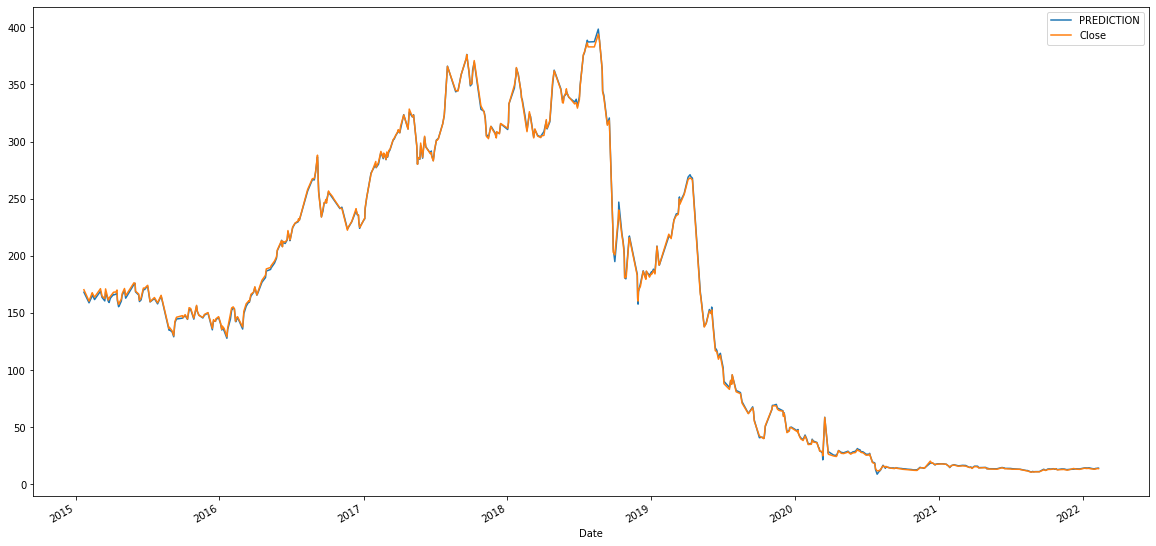

In [75]:
compare.plot(figsize=(20,10))

In [76]:
lm.coef_

array([ 3.91138687e-01,  4.68068328e-01, -3.02811128e-01, -3.21642379e-09,
        4.60171452e-01])

In [77]:
X.columns

Index(['High', 'Low', 'Open', 'Volume', 'Adj Close'], dtype='object')

In [78]:
pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])

,Coefficient
High,3.911387e-01
Low,4.680683e-01
Open,-3.028111e-01
Volume,-3.216424e-09
Adj Close,4.601715e-01
